# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.


In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [14]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """
    n = X_train.shape[0]
    num_pos = (Y_train == 1).sum()
    num_neg = n - num_pos
    X_train_pos = np.zeros((num_pos, 2))
    X_train_neg = np.zeros((num_neg, 2))
    a = num_pos/(num_neg + num_pos)

    p_c = 0
    n_c = 0
    for i in range(n):
        if Y_train[i] == 1:
            X_train_pos[p_c] = X_train[i]
            p_c += 1
        else:
            X_train_neg[n_c] = X_train[i]
            n_c += 1

    mu_pos = np.sum(X_train_pos, axis=0)/num_pos
    mu_neg = np.sum(X_train_neg, axis=0)/num_neg

    m = X_test.shape[0]
    Y_test_pred = np.zeros(m)

    w = mu_neg - mu_pos
    b = (np.dot(mu_pos, mu_pos) - np.dot(mu_neg, mu_neg))*0.5

    for i in range(m):
        temp = np.dot(w, X_test[i]) + b
        Y_test_pred[i] = np.sign(a/(a + (1 - a)*np.exp(temp)) - 0.5)

    return Y_test_pred


def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """
    n = X_train.shape[0]
    d = X_train[0].shape[0]  # dimension
    num_pos = (Y_train == 1).sum()
    num_neg = n - num_pos
    X_train_pos = np.zeros((num_pos, 2))
    X_train_neg = np.zeros((num_neg, 2))
    a = num_pos/(num_neg + num_pos)

    p_c = 0
    n_c = 0
    for i in range(n):
        if Y_train[i] == 1:
            X_train_pos[p_c] = X_train[i]
            p_c += 1
        else:
            X_train_neg[n_c] = X_train[i]
            n_c += 1

    mu_pos = np.sum(X_train_pos, axis=0)/num_pos
    mu_neg = np.sum(X_train_neg, axis=0)/num_neg

    # initialize covarience matrices
    cov = np.zeros((X_train[0].shape[0], X_train[0].shape[0]))

    for i in range(num_pos):
        temp = np.reshape(X_train_pos[i] - mu_pos, (1, d))
        cov += np.dot(temp.T, temp)

    for i in range(num_neg):
        temp = np.reshape(X_train_neg[i] - mu_neg, (1, d))
        cov += np.dot(temp.T, temp)
    cov /= n

    m = X_test.shape[0]
    Y_test_pred = np.zeros(m)

    for i in range(m):
        temp_pos = np.dot(
            np.dot((X_test[i] - mu_pos).T, np.linalg.inv(cov)), X_test[i] - mu_pos)
        temp_neg = np.dot(
            np.dot((X_test[i] - mu_neg).T, np.linalg.inv(cov)), X_test[i] - mu_neg)
        Y_test_pred[i] = np.sign(
            a/(a + (1-a)*np.exp(-0.5*(temp_neg - temp_pos))) - 0.5)

    return Y_test_pred


def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """
    n = X_train.shape[0]
    d = X_train[0].shape[0]  # dimension
    num_pos = (Y_train == 1).sum()
    num_neg = n - num_pos
    X_train_pos = np.zeros((num_pos, 2))
    X_train_neg = np.zeros((num_neg, 2))
    a = num_pos/(num_neg + num_pos)

    p_c = 0
    n_c = 0
    for i in range(n):
        if Y_train[i] == 1:
            X_train_pos[p_c] = X_train[i]
            p_c += 1
        else:
            X_train_neg[n_c] = X_train[i]
            n_c += 1

    mu_pos = np.sum(X_train_pos, axis=0)/num_pos
    mu_neg = np.sum(X_train_neg, axis=0)/num_neg

    # initialize covarience matrices
    cov1 = np.zeros((X_train[0].shape[0], X_train[0].shape[0]))
    cov2 = cov1

    for i in range(num_pos):
        temp = np.reshape(X_train_pos[i] - mu_pos, (1, d))
        cov1 += np.dot(temp.T, temp)
    cov1 /= num_pos

    for i in range(num_neg):
        temp = np.reshape(X_train_neg[i] - mu_neg, (1, d))
        cov2 += np.dot(temp.T, temp)
    cov2 /= num_neg

    m = X_test.shape[0]
    Y_test_pred = np.zeros(m)

    for i in range(m):
        temp_pos = np.dot(
            np.dot((X_test[i] - mu_pos).T, np.linalg.inv(cov1)), X_test[i] - mu_pos)
        temp_neg = np.dot(
            np.dot((X_test[i] - mu_neg).T, np.linalg.inv(cov2)), X_test[i] - mu_neg)
        Y_test_pred[i] = np.sign(
            a/(a + (1-a)*np.exp(-0.5*(temp_neg - temp_pos))) - 0.5)

    return Y_test_pred

    
    




In [15]:
# Cell type : Convenience


**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets as 3x3 table, with appropriately named rows and columns.


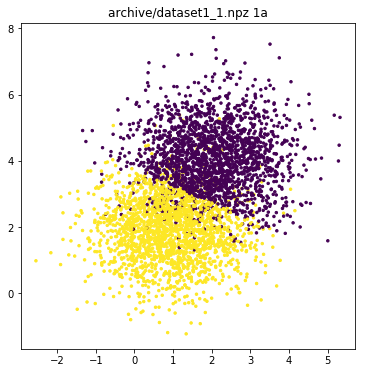

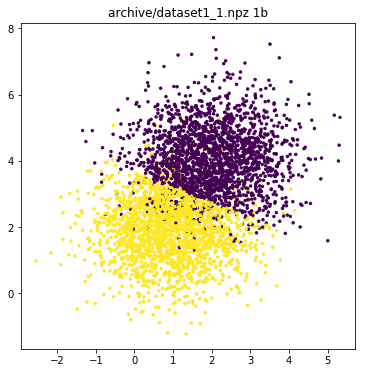

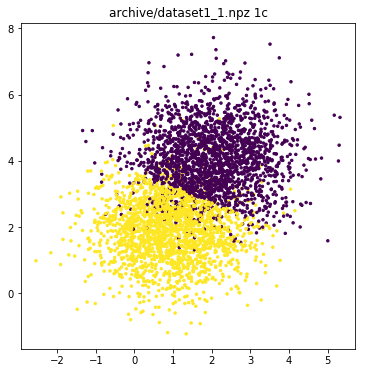

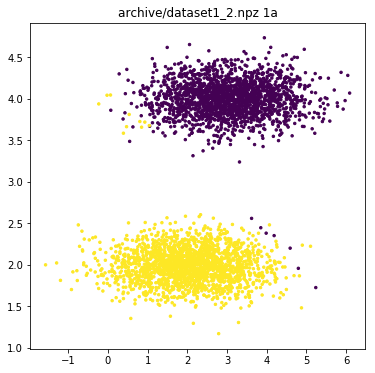

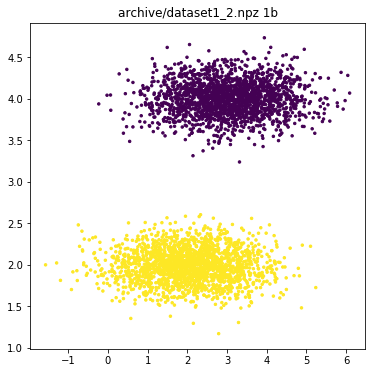

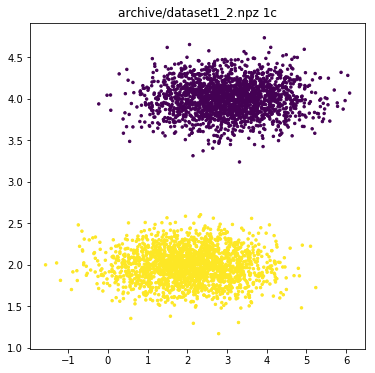

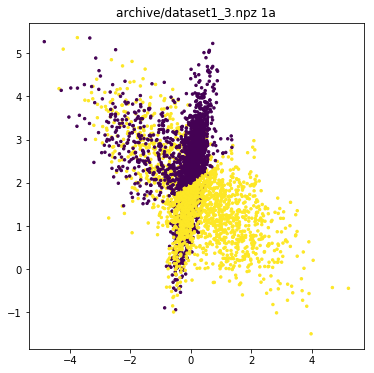

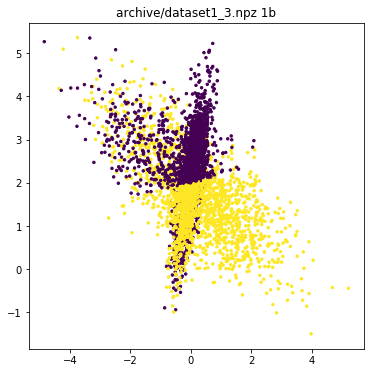

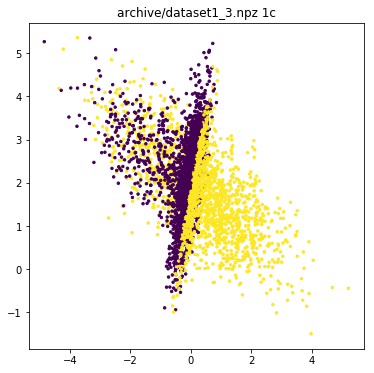

In [16]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

datasets = ['archive/dataset1_1.npz', 'archive/dataset1_2.npz', 'archive/dataset1_3.npz']

for dataset in datasets:
    data = np.load(dataset)
    Y_pred_test_1a = Bayes1a(data['arr_0'], data['arr_1'], data['arr_2'])
    Y_pred_test_1b = Bayes1b(data['arr_0'], data['arr_1'], data['arr_2'])
    Y_pred_test_1c = Bayes1c(data['arr_0'], data['arr_1'], data['arr_2'])
    X = np.concatenate((data['arr_0'][:, 0], data['arr_2'][:, 0]))
    Y = np.concatenate((data['arr_0'][:, 1], data['arr_2'][:, 1]))
    plt.figure(figsize=(6,6))
    plt.scatter(X, Y, c=np.concatenate((data['arr_1'], Y_pred_test_1a)), s=6)
    plt.title(dataset + ' 1a')
    plt.show()

    plt.figure(figsize=(6,6))
    plt.scatter(X, Y, c=np.concatenate((data['arr_1'], Y_pred_test_1b)), s=6)
    plt.title(dataset + ' 1b')
    plt.show()

    plt.figure(figsize=(6,6))
    plt.scatter(X, Y, c=np.concatenate((data['arr_1'], Y_pred_test_1c)), s=6)
    plt.title(dataset + ' 1c')
    plt.show()

    temp1 = 0
    temp2 = 0
    temp3 = 0
    for i in range(Y_pred_test_1a.shape[0]):
        if Y_pred_test_1a[i] == data['arr_3'][i]:
            temp1 += 1
    for i in range(Y_pred_test_1b.shape[0]):
        if Y_pred_test_1b[i] == data['arr_3'][i]:
            temp2 += 1
    for i in range(Y_pred_test_1c.shape[0]):
        if Y_pred_test_1c[i] == data['arr_3'][i]:
            temp3 += 1

    accuracy1a = temp1/Y_pred_test_1a.shape[0]
    accuracy1b = temp2/Y_pred_test_1b.shape[0]
    accuracy1c = temp3/Y_pred_test_1c.shape[0]
#     print(accuracy1a, accuracy1b, accuracy1c)


**Observations for Problem 1**

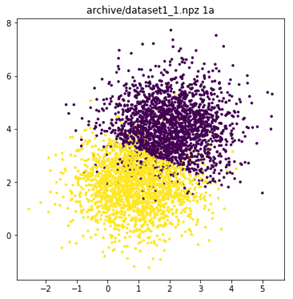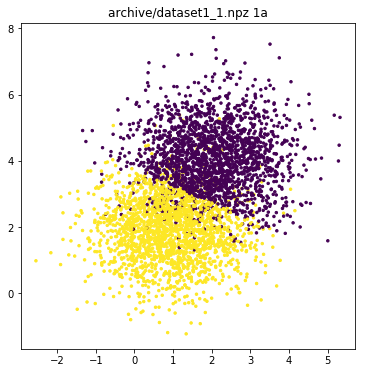



** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [5]:
# Cell type : CodeWrite
# Fill in functions in this cell


def classify(ita):
    L = np.array([[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 0, 1], [3, 2, 1, 0]])
    min = np.dot(L[0], ita)
    ans = 0
    for i in range(1, 4):
        temp = np.dot(L[i], ita)
        if temp < min:
            min = temp
            ans = i
    return ans + 1


def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)

    """
    n = X_train.shape[0]
    d = X_train[0].shape[0]  # dimension
    num_0 = (Y_train == 1.0).sum()
    num_1 = (Y_train == 2.0).sum()
    num_2 = (Y_train == 3.0).sum()
    num_3 = n - num_0 - num_1 - num_2
    num = np.array([num_0, num_1, num_2, num_3])
    mu = np.zeros((4, d))
    a = np.zeros(4)

    for i in range(4):
        a[i] = num[i]/n

    for i in range(n):
        mu[int(Y_train[i] - 1.0)] += X_train[i]

    for i in range(4):
        mu[i] /= num[i]

    m = X_test.shape[0]
    Y_test_pred = np.zeros(m)

    for i in range(m):
        denom = 0
        for j in range(4):
            denom += np.exp(-0.5 *
                            np.dot(X_test[i] - mu[j], X_test[i] - mu[j])) * a[j]
        ita = np.zeros(4)
        for j in range(4):
            ita[j] = np.exp(-0.5 * np.dot(X_test[i] - mu[j],
                                          X_test[i] - mu[j])) * a[j]/denom
        Y_test_pred[i] = classify(ita)
    return Y_test_pred


def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)

    """
    n = X_train.shape[0]
    d = X_train[0].shape[0]  # dimension
    num_0 = (Y_train == 1.0).sum()
    num_1 = (Y_train == 2.0).sum()
    num_2 = (Y_train == 3.0).sum()
    num_3 = n - num_0 - num_1 - num_2
    num = np.array([num_0, num_1, num_2, num_3])
    mu = np.zeros((4, d))
    a = np.zeros(4)
    cov = np.zeros((d, d))

    for i in range(4):
        a[i] = num[i]/n

    for i in range(n):
        mu[int(Y_train[i] - 1.0)] += X_train[i]

    for i in range(4):
        mu[i] /= num[i]

    for i in range(n):
        j = int(Y_train[i] - 1.0)
        temp = np.reshape(X_train[i] - mu[j], (1, d))
        cov += np.dot(temp.T, temp)

    cov /= n

    m = X_test.shape[0]
    Y_test_pred = np.zeros(m)

    for i in range(m):
        denom = 0
        ita = np.zeros(4)
        for j in range(4):
            ita[j] = np.exp(-0.5 * np.dot(np.dot(X_test[i] - mu[j],
                                                 np.linalg.inv(cov)), X_test[i] - mu[j])) * a[j]
            denom += ita[j]

        for j in range(4):
            ita[j] /= denom
        Y_test_pred[i] = classify(ita)
    return Y_test_pred


def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)

    """
    n = X_train.shape[0]
    d = X_train[0].shape[0]  # dimension
    num_0 = (Y_train == 1.0).sum()
    num_1 = (Y_train == 2.0).sum()
    num_2 = (Y_train == 3.0).sum()
    num_3 = n - num_0 - num_1 - num_2
    num = np.array([num_0, num_1, num_2, num_3])
    mu = np.zeros((4, d))
    a = np.zeros(4)
    cov = np.zeros((4, d, d))

    for i in range(4):
        a[i] = num[i]/n

    for i in range(n):
        mu[int(Y_train[i] - 1.0)] += X_train[i]

    for i in range(4):
        mu[i] /= num[i]

    for i in range(n):
        j = int(Y_train[i] - 1.0)
        temp = np.reshape(X_train[i] - mu[j], (1, d))
        cov[j] += np.dot(temp.T, temp)

    for i in range(4):
        cov[i] /= num[i]

    m = X_test.shape[0]
    Y_test_pred = np.zeros(m)

    for i in range(m):
        denom = 0
        ita = np.zeros(4)
        for j in range(4):
            ita[j] = np.exp(-0.5 * np.dot(np.dot(X_test[i] - mu[j],
                                                 np.linalg.inv(cov[j])), X_test[i] - mu[j])) * a[j]
            denom += ita[j]

        for j in range(4):
            ita[j] /= denom
        Y_test_pred[i] = classify(ita)
    return Y_test_pred

In [6]:
# Cell type : Convenience

# Testing the functions above

# Data 1


#     print(accuracy1a, accuracy1b, accuracy1c)


**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


<Figure size 720x720 with 0 Axes>

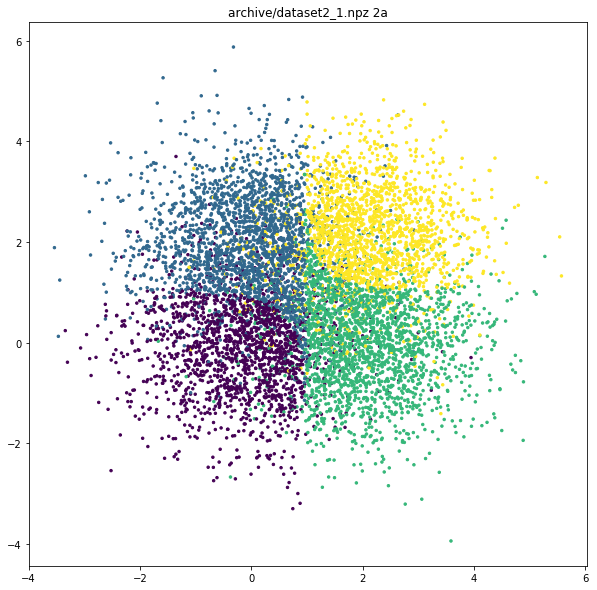

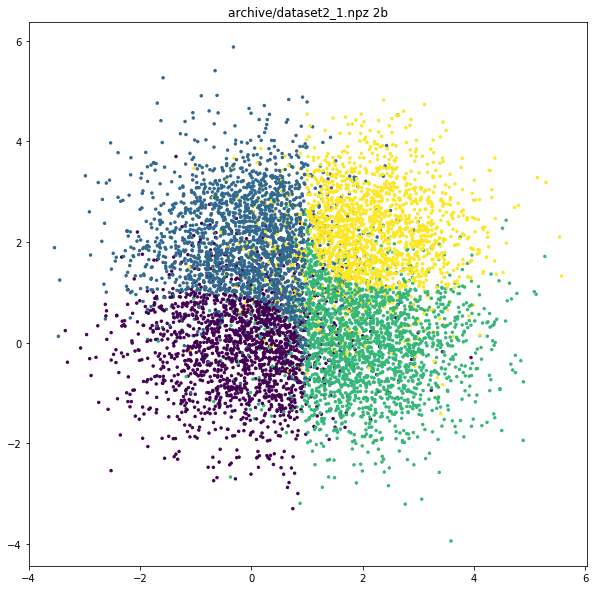

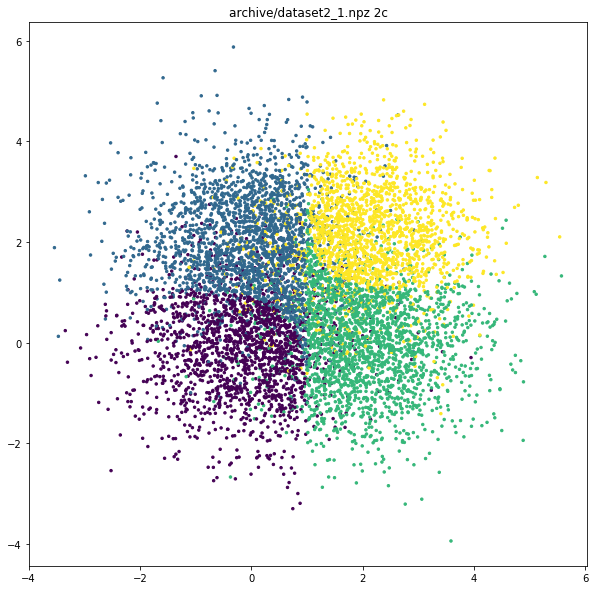

<Figure size 720x720 with 0 Axes>

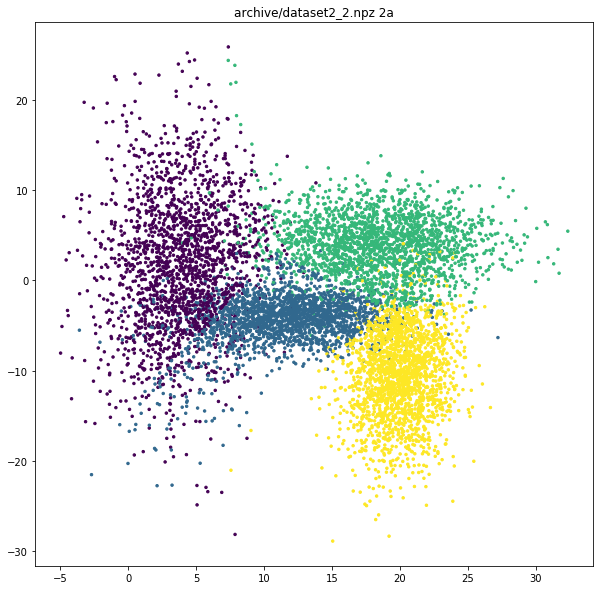

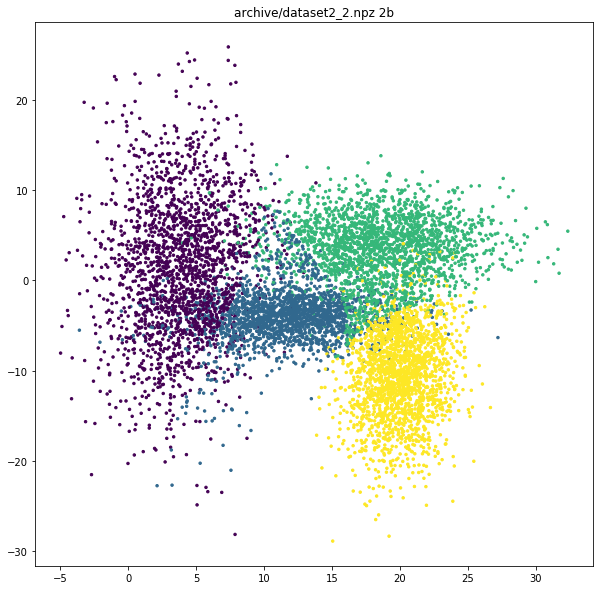

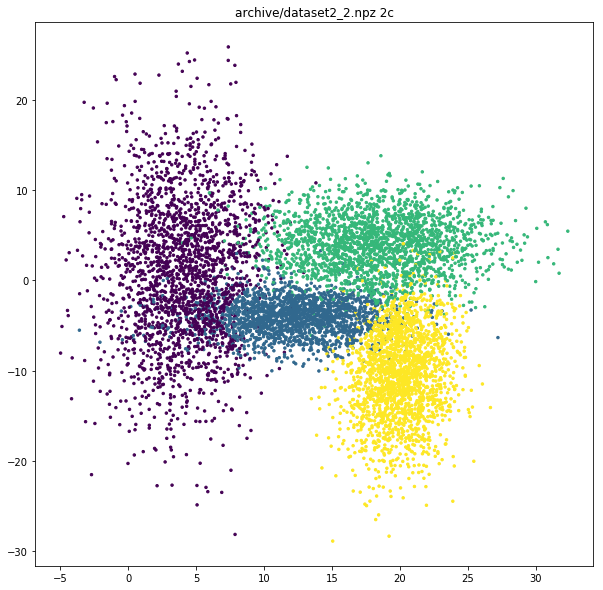

In [7]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
datasets = ['archive/dataset2_1.npz', 'archive/dataset2_2.npz']

for dataset in datasets:
    data = np.load(dataset)
    Y_pred_test_2a = Bayes2a(data['arr_0'], data['arr_1'], data['arr_2'])
    Y_pred_test_2b = Bayes2b(data['arr_0'], data['arr_1'], data['arr_2'])
    Y_pred_test_2c = Bayes2c(data['arr_0'], data['arr_1'], data['arr_2'])
    plt.figure(figsize=(10, 10))
    X = np.concatenate((data['arr_0'][:,0],data['arr_2'][:,0]))
    Y = np.concatenate((data['arr_0'][:,1],data['arr_2'][:,1]))
    
    plt.figure(figsize=(10, 10))
    plt.scatter(X,Y,c=np.concatenate((data['arr_1'],Y_pred_test_2a)),s=6)
    plt.title(dataset + ' 2a')
    plt.show()
    
    plt.figure(figsize=(10, 10))
    plt.scatter(X,Y,c=np.concatenate((data['arr_1'],Y_pred_test_2b)),s=6)
    plt.title(dataset + ' 2b')
    plt.show()
    
    plt.figure(figsize=(10, 10))
    plt.scatter(X,Y,c=np.concatenate((data['arr_1'],Y_pred_test_2c)),s=6)
    plt.title(dataset + ' 2c')
    plt.show()
    
    temp1 = 0
    temp2 = 0
    temp3 = 0
    for i in range(Y_pred_test_2a.shape[0]):
        if Y_pred_test_2a[i] == data['arr_3'][i]:
            temp1 += 1
    for i in range(Y_pred_test_2b.shape[0]):
        if Y_pred_test_2b[i] == data['arr_3'][i]:
            temp2 += 1
    for i in range(Y_pred_test_2c.shape[0]):
        if Y_pred_test_2c[i] == data['arr_3'][i]:
            temp3 += 1

    accuracy1a = temp1/Y_pred_test_2a.shape[0]
    accuracy1b = temp2/Y_pred_test_2b.shape[0]
    accuracy1c = temp3/Y_pred_test_2c.shape[0]


** Cell type : TextWrite ** 
(Write your observations and table of errors here)



**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{m} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Repeat for 100 times, and estimate the bias and variance for all 30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms (corresponding to 5 degrees and 6 lambda values) analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. 

3b) In the next text cell, give the Bias and Variance computed as a $5\times 6$ matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




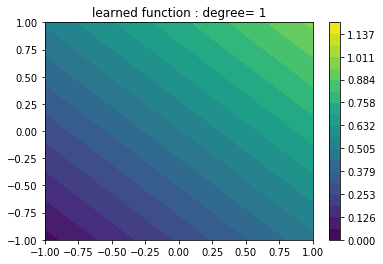

Degree= 1 lambda= 1e-09
Bias = 0.22508250637791316
Variance = 0.003359824357999226
MSE = 0.04730231035420274


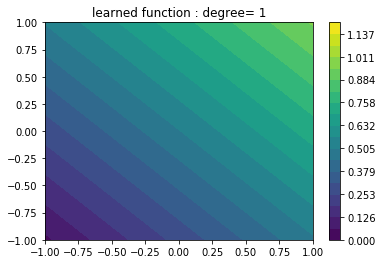

Degree= 1 lambda= 1e-07
Bias = 0.23305234724108417
Variance = 0.0010293654092129443
MSE = 0.05328402877139797


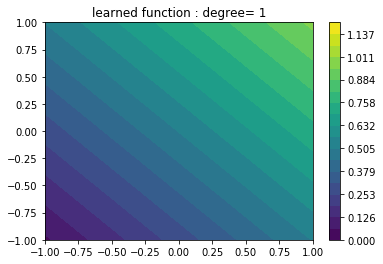

Degree= 1 lambda= 1e-05
Bias = 0.24264693178301203
Variance = 0.003116913830732283
MSE = 0.05576084758151874


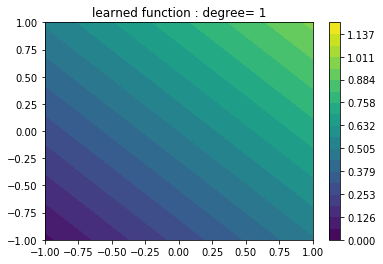

Degree= 1 lambda= 0.001
Bias = 0.2377026644037522
Variance = 0.0034065220340864866
MSE = 0.05312746269406049


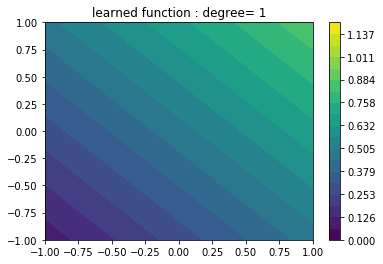

Degree= 1 lambda= 0.1
Bias = 0.24622145821636415
Variance = 0.0036904145750917315
MSE = 0.05270354403554395


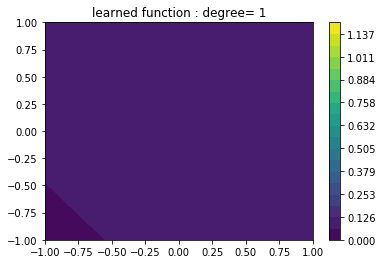

Degree= 1 lambda= 10.0
Bias = 0.3932497993680214
Variance = 0.00039674987774223784
MSE = 0.16753105407067317


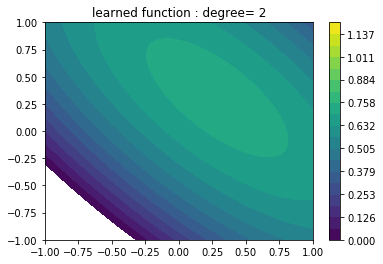

Degree= 2 lambda= 1e-09
Bias = 0.17686423134943835
Variance = 0.004447824858333617
MSE = 0.026833131285430616


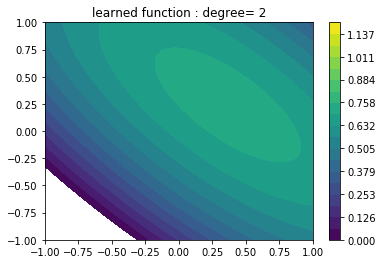

Degree= 2 lambda= 1e-07
Bias = 0.18561344296189003
Variance = 0.0024475322184292748
MSE = 0.032004824136252025


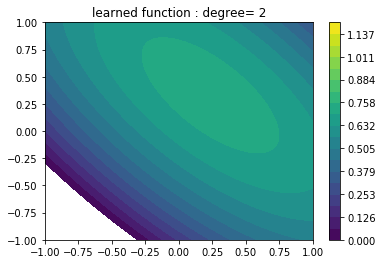

Degree= 2 lambda= 1e-05
Bias = 0.2214501461715448
Variance = 0.005006348939624894
MSE = 0.04403380265925349


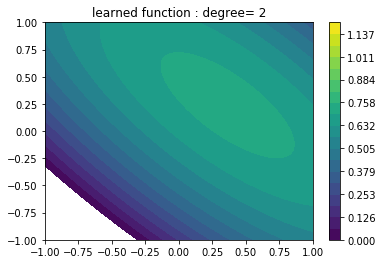

Degree= 2 lambda= 0.001
Bias = 0.19427914464912815
Variance = 0.0021050117888270488
MSE = 0.0356180154141541


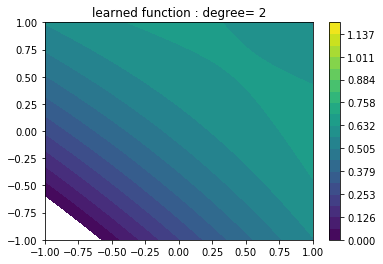

Degree= 2 lambda= 0.1
Bias = 0.197690725066192
Variance = 0.0009701591990180405
MSE = 0.0389558770393342


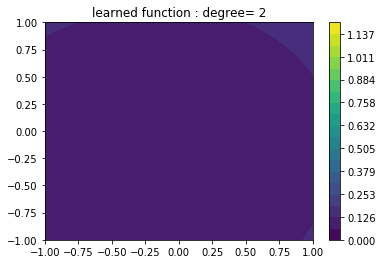

Degree= 2 lambda= 10.0
Bias = 0.5129398438939676
Variance = 0.00010699300657000871
MSE = 0.25778149102271003


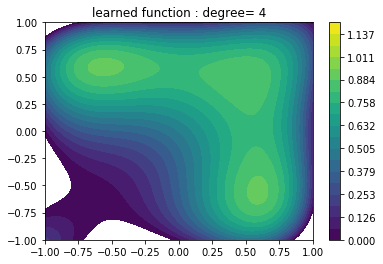

Degree= 4 lambda= 1e-09
Bias = 0.1053249959595796
Variance = 0.005285584687539699
MSE = 0.005807770637337037


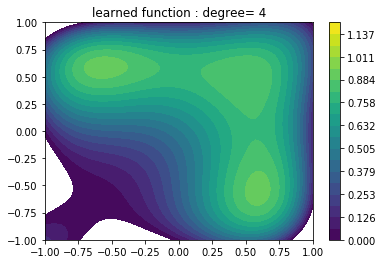

Degree= 4 lambda= 1e-07
Bias = 0.08886891191098066
Variance = 0.004138808442817369
MSE = 0.0037588135908201347


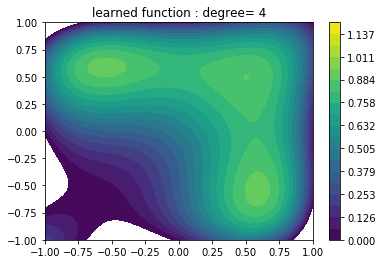

Degree= 4 lambda= 1e-05
Bias = 0.06407187765720831
Variance = 0.0016051757417097651
MSE = 0.0024714080870519416


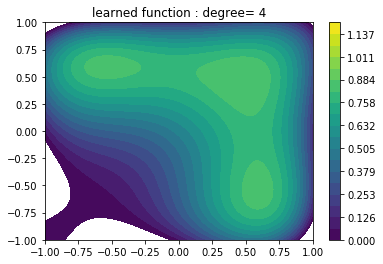

Degree= 4 lambda= 0.001
Bias = 0.07461575118325063
Variance = 0.0012138662611854197
MSE = 0.004014949394600229


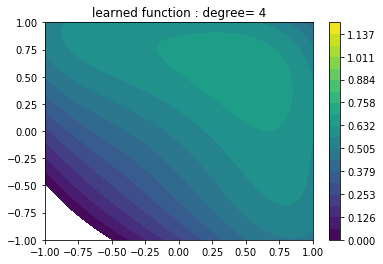

Degree= 4 lambda= 0.1
Bias = 0.20425171418858046
Variance = 0.0034691950596680366
MSE = 0.03262395322843093


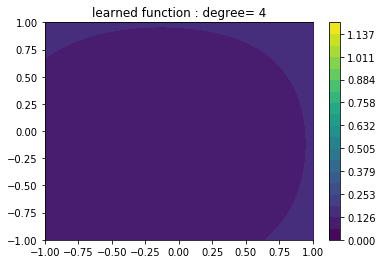

Degree= 4 lambda= 10.0
Bias = 0.510679900328578
Variance = 3.073230223951226e-05
MSE = 0.258218570523592


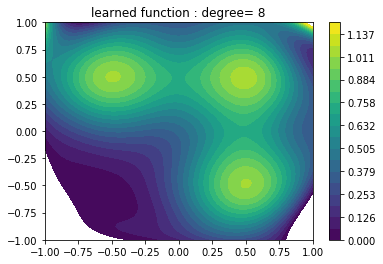

Degree= 8 lambda= 1e-09
Bias = 0.07481885376110137
Variance = 0.005597476910149595
MSE = 2.655946670289188e-07


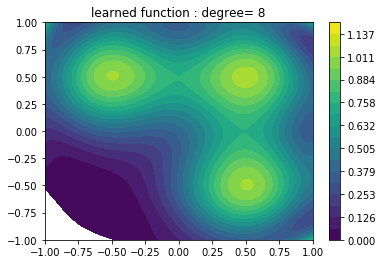

Degree= 8 lambda= 1e-07
Bias = 0.035671923554195205
Variance = 0.0012654150840687704
MSE = 3.268797722439983e-06


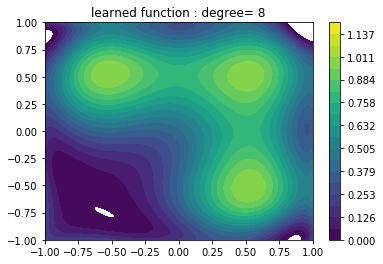

Degree= 8 lambda= 1e-05
Bias = 0.03618355093463048
Variance = 0.0011639047837784112
MSE = 9.133756624451838e-05


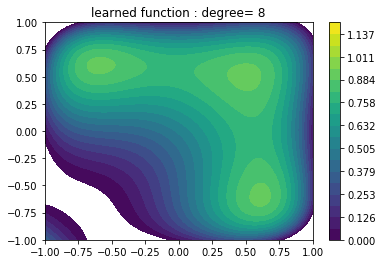

Degree= 8 lambda= 0.001
Bias = 0.07113708309943764
Variance = 0.002613668117695778
MSE = 0.0021387842541417206


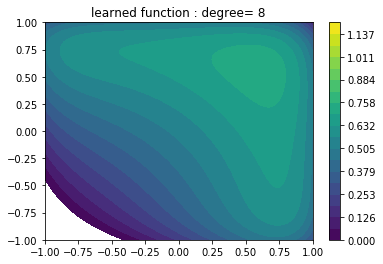

Degree= 8 lambda= 0.1
Bias = 0.19027327651939716
Variance = 0.004495711567340358
MSE = 0.02727066595705017


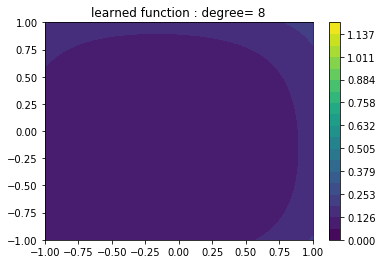

Degree= 8 lambda= 10.0
Bias = 0.460439057023289
Variance = 2.9684251685560287e-05
MSE = 0.2149760504535882


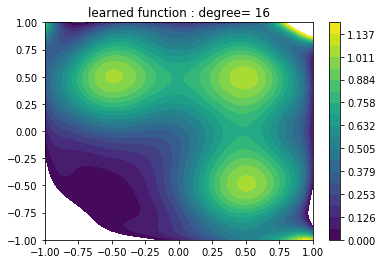

Degree= 16 lambda= 1e-09
Bias = 0.15814661753994583
Variance = 0.02501023148950855
MSE = 2.5489020427888785e-09


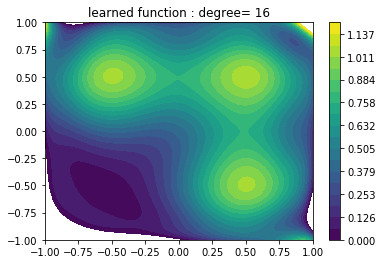

Degree= 16 lambda= 1e-07
Bias = 0.24751523086525684
Variance = 0.061260806013902866
MSE = 9.086528535373035e-07


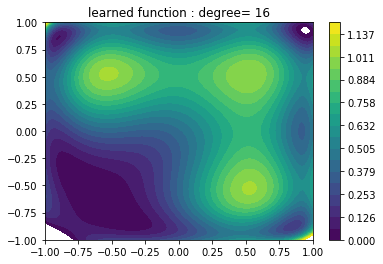

Degree= 16 lambda= 1e-05
Bias = 0.053826525236044594
Variance = 0.0027767457495442753
MSE = 7.386250355976682e-05


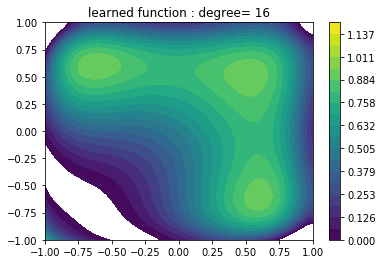

Degree= 16 lambda= 0.001
Bias = 0.09901098716185155
Variance = 0.006628289177378146
MSE = 0.0025717588170684215


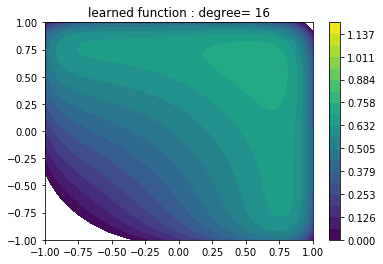

Degree= 16 lambda= 0.1
Bias = 0.15815689013810902
Variance = 0.0024131966926470255
MSE = 0.02332753290879559


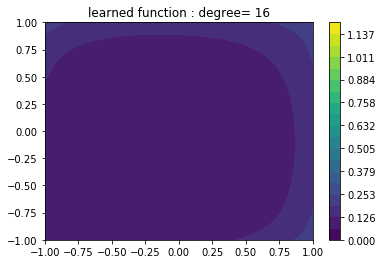

Degree= 16 lambda= 10.0
Bias = 0.4812255786142627
Variance = 3.800651354548449e-05
MSE = 0.22944865304437248


In [10]:
# Cell type : CodeWrite

def phi(x, degree):
    phi = np.zeros(int((degree + 1)*(degree + 2)/2))
    count = 0
    for d in range(degree + 1):
        for i in range(d + 1):
            phi[count] = x[0]**i * x[1]**(d - i)
            count += 1
    return phi


def f(x):
    a = np.array([0.5, 0.5])
    b = np.array([-0.5, 0.5])
    c = np.array([0.5, -0.5])

    return np.exp(-4 * np.dot(x - a, x - a)) + np.exp(-4 * np.dot(x - b, x - b)) + np.exp(-4 * np.dot(x - c, x - c))


def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)

    """
    m = X_test.shape[0]
    Y_test_pred = np.zeros(m)

    for i in range(m):
        Y_test_pred[i] = np.dot(wt_vector, phi(X_test[i], degree))

    return Y_test_pred


def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.

    """
    X, Y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
    Z = np.zeros(X.shape)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            point = np.array([X[i, j], Y[i, j]])
            Z[i, j] = np.dot(wt_vector, phi(point, degree))

    plt.contourf(X, Y, Z, levels=np.linspace(0., 1.2, 20))
    plt.title('learned function : degree= ' + str(degree) + title)
    plt.colorbar()
    plt.show()


def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'

    """
    n = X_train.shape[0]
    Phi = np.zeros((n, int((degree + 1)*(degree + 2)/2)))

    for i in range(n):
        Phi[i] = phi(X_train[i], degree)

    temp1 = np.linalg.inv(
        np.dot(Phi.T, Phi) + n/2 * reg_param * np.identity(int((degree + 1)*(degree + 2)/2)))
    temp2 = np.dot(Phi.T, Y_train)
    wt_vector = np.dot(temp1, temp2)
    return wt_vector


def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.

    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.

    In total 4 subplots in one plot with appropriate title including degree and lambda value.

    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.

    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)

    Also return bias, variance, mean squared error. """
    # g is expectation of f_s
    g = np.zeros(int((degree + 1)*(degree + 2)/2))
    X_train = 2 * np.random.rand(num_training_samples, 2) - 1
    Y_train = list(map(f, X_train))
    fs = polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param)

    # for computing g (the average)
    for i in range(100):
        X_train = 2 * np.random.rand(num_training_samples, 2) - 1
        Y_train = list(map(f, X_train))
        fs = polynomial_regression_ridge_train(
            X_train, Y_train, degree, reg_param)
        g += fs
    g /= 100

    bias_sqr = 0
    for i in range(num_training_samples):
        temp = f(X_train[i]) - np.dot(g, phi(X_train[i], degree))
        bias_sqr += temp * temp
    bias_sqr /= num_training_samples

    var = 0
    for i in range(num_training_samples):
        temp = np.dot(g, phi(X_train[i], degree)) - \
            np.dot(fs, phi(X_train[i], degree))
        var += temp * temp
    var /= num_training_samples

    mse = 0
    for i in range(num_training_samples):
        temp = f(X_train[i]) - np.dot(fs, phi(X_train[i], degree))
        mse += temp * temp
    mse /= num_training_samples

    visualise_polynomial_2d(g, degree)

    return np.sqrt(bias_sqr), var, mse

for degree in [1,2,4,8,16]:
    for reg_param in [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]:
        plt.figure()
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        print('================================')
        print('Degree= '+str(degree)+' lambda= '+str(reg_param))
        print('Bias = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e))
        

In [8]:
# Cell type: convenience



** Cell type: TextWrite **
Give the biases and variances computed for the various algorithms with various degrees and lambdas and summarise your findings.



** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using three different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{m} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter. 

In the next codewrite cell, for each training set size compute how the train and test squared error varies with degree (by changing $\phi$) and regularisation parameter (changing $\lambda$). Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title including the hyperparameters. Total number of figures = 4 (one for each training set size.)

Summarise your findings in the next tex cell in a few sentences. And reproduce the tables showing train and test error for various training sizes, with appropriate row and column names. (4 tables of train error of size 6x5 and 4 tables of test error of size 6x5).




In [13]:
# Cell type : CodeWrite 
def error(degree, reg_param, X_train, Y_train):
    # g is expectation of f_s
    g = np.zeros(int((degree + 1)*(degree + 2)/2))
    fs = polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param)

    # for computing g (the average)
    for i in range(100):
        X_train = 2 * np.random.rand(num_training_samples, 2) - 1
        Y_train = list(map(f, X_train))
        fs = polynomial_regression_ridge_train(
            X_train, Y_train, degree, reg_param)
        g += fs
    g /= 100

    mse = 0
    for i in range(num_training_samples):
        temp = f(X_train[i]) - np.dot(fs, phi(X_train[i], degree))
        mse += temp * temp + np.dot(fs,fs)
    mse /= num_training_samples
#     visualise_polynomial_2d(g, degree)
    return mse

data = np.load('archive/dataset4_1.npz')

for num_training_samples in [50, 100, 200, 1000]:
    for degree in [1, 2, 4, 8, 16]:
        for reg_param in [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]:
            plt.figure()
            e = error(degree,reg_param,data['arr_0'][0:num_training_samples + 1],data['arr_1'][0:num_training_samples + 1])
            print(str(e) + ' '),
        print()
    print('\n')


0.3792535797938236 
0.46317268213534435 
0.3385376861468851 
0.4224738379708719 
0.32946030354304795 
0.28167749364925 

0.9147416341352913 
0.6346443494084404 
0.838914735335884 
1.0405059856135463 
0.5549448965877871 
0.2003428368326231 

5.763963333854336 
8.405848718749946 
6.286405048219707 
4.549918082101703 
0.48232621150463273 
0.24855698771551948 

325.933282435669 
391.75252716595065 


c:\users\akhil\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


35.570168126108236 
3.830281811149283 
0.48864128690146363 
0.2593503841290399 

268.42179375924366 
128.6738912596562 
46.043450194057215 
6.003703183633999 
0.5828490606233129 
0.24200804113887905 



0.39547623825332195 
0.3848583747214374 
0.37889544337917175 
0.41154004087735674 
0.34377951248666627 
0.25488940094555235 

1.0257459335404215 
1.100028309208643 
0.806298494527446 
0.8429188145927954 
0.5011244202592785 
0.25924039062204146 

6.938148118505147 
8.055606117624142 
9.493077122914535 
4.030111556581333 
0.49497015470536054 
0.25051629305056805 

268.54965283366937 
217.4907955067607 
58.24681088849424 
4.681809981323991 
0.5464988811876758 
0.27005469960521683 

894.7911149591181 
240.03585060309317 
51.06554439526023 
5.787259928417416 
0.5262558260857599 
0.24640577286257925 



0.4786126314572723 
0.4286986214215415 
0.41780535394761287 
0.4075688969689037 
0.3557354237885695 
0.265395296011408 

0.8347632826625506 
0.7557708727635389 
0.7851881190451562 
0.724675740

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

** Cell type : TextWrite **